In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("./500_Person_Gender_Height_Weight_Index.csv")

In [4]:
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
dataset.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
dataset.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
gender = LabelEncoder()
dataset['Gender'] = gender.fit_transform(dataset['Gender'])

In [8]:
dataset

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [9]:
bins = (-1,0,1,2,3,4,5)
bmiScale = ['Malnourished', 'Underweight', 'Healthy Weight', 'Slightly Overweight', 'Overweight', 'Obese']
dataset['Index'] = pd.cut(dataset['Index'], bins = bins, labels = bmiScale)
dataset['Index']

0               Overweight
1           Healthy Weight
2               Overweight
3      Slightly Overweight
4      Slightly Overweight
              ...         
495                  Obese
496             Overweight
497                  Obese
498                  Obese
499                  Obese
Name: Index, Length: 500, dtype: category
Categories (6, object): [Malnourished < Underweight < Healthy Weight < Slightly Overweight < Overweight < Obese]

In [10]:
dataset['Index'].value_counts()

Obese                  198
Overweight             130
Healthy Weight          69
Slightly Overweight     68
Underweight             22
Malnourished            13
Name: Index, dtype: int64

In [11]:
dataset['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

In [13]:
dataset['Height'].value_counts()

188    15
179    14
187    14
168    13
178    13
182    12
172    12
184    12
183    11
150    11
181    11
185    11
157    10
154    10
153    10
165    10
169    10
195    10
186     9
167     9
164     9
162     9
142     9
161     9
159     9
145     9
177     9
146     9
190     9
166     9
152     8
163     8
151     8
141     8
140     8
171     8
174     8
180     8
197     7
160     7
147     7
176     7
191     7
156     6
192     6
196     6
155     6
170     6
194     5
198     5
144     5
193     5
189     5
148     5
149     5
158     5
175     4
173     4
143     3
199     3
Name: Height, dtype: int64

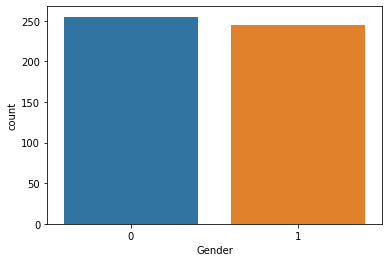

In [14]:
sns.countplot(dataset['Gender'])

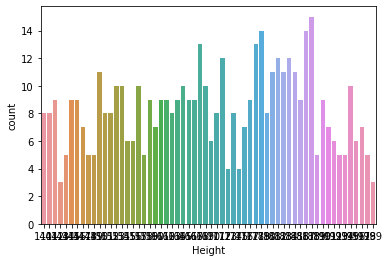

In [15]:
sns.countplot(dataset['Height'])

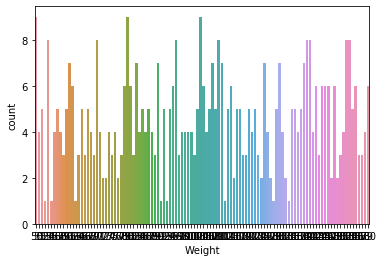

In [16]:
sns.countplot(dataset['Weight'])

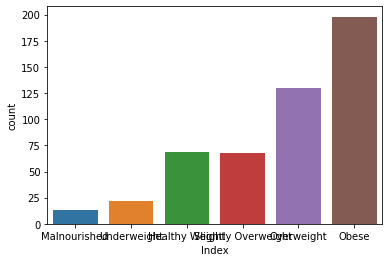

In [17]:
sns.countplot(dataset['Index'])

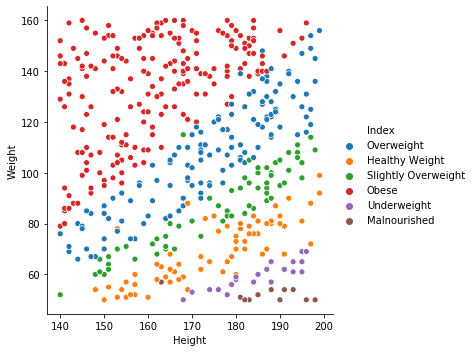

In [18]:
sns.relplot(x = 'Height', y = "Weight", hue = "Index", data = dataset)

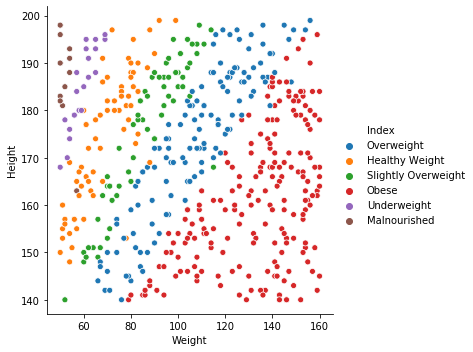

In [19]:
sns.relplot(x = 'Weight', y = "Height", hue = "Index", data = dataset)

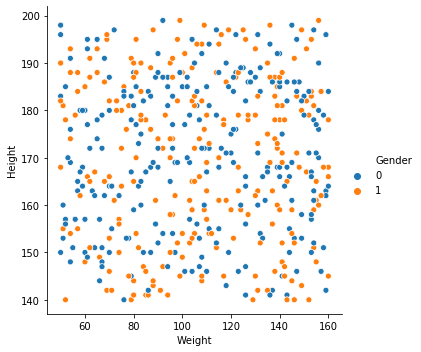

In [20]:
sns.relplot(x = 'Weight', y = "Height", hue = "Gender", data = dataset)

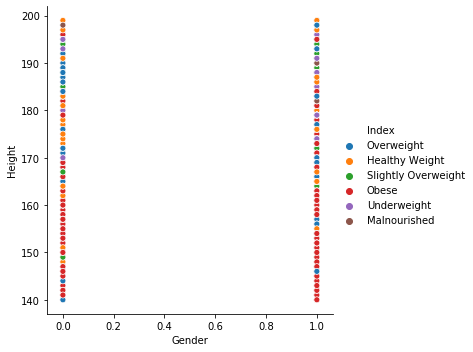

In [21]:
sns.relplot(x = 'Gender', y = "Height", hue = "Index", data = dataset)

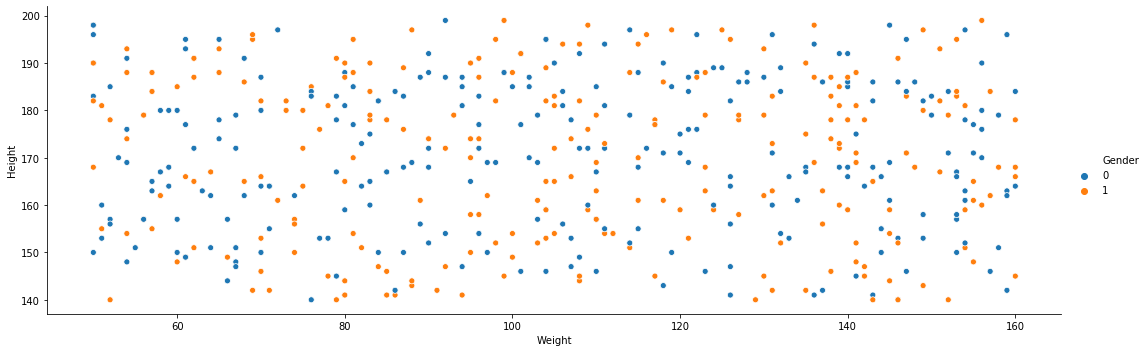

In [22]:
sns.relplot(x = 'Weight', y = "Height", hue = "Gender", data = dataset, height = 5, aspect = 3)

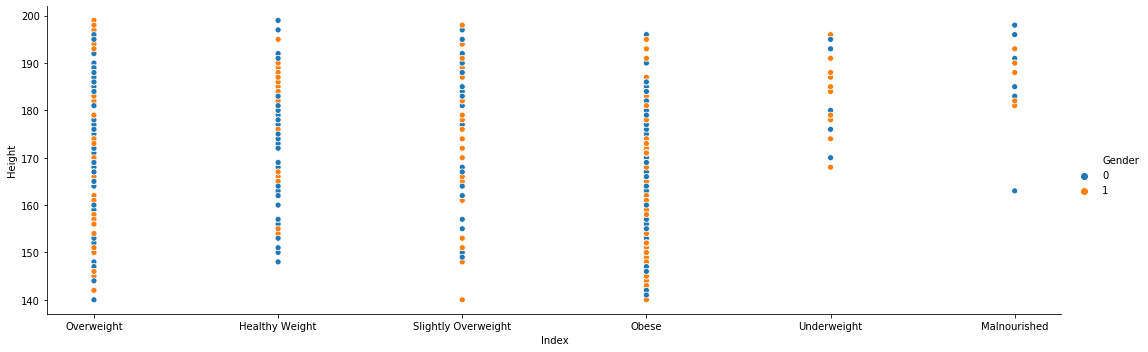

In [23]:
sns.relplot(x = 'Index', y = "Height", hue = "Gender", data = dataset, height = 5, aspect = 3)

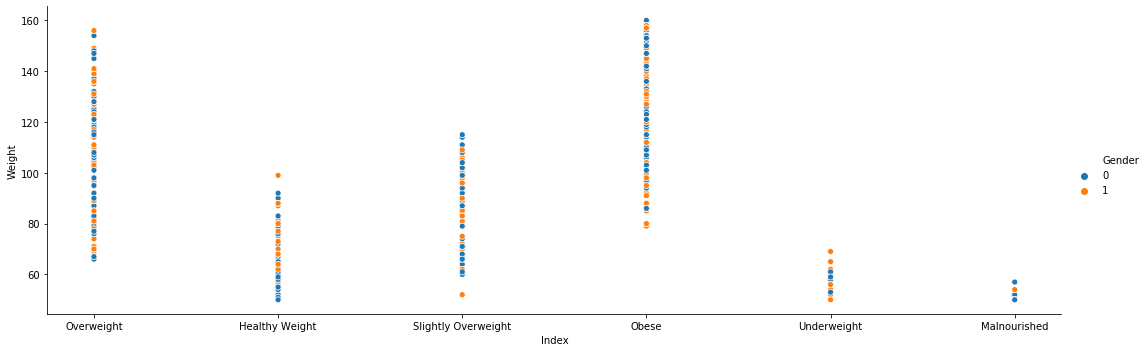

In [24]:
sns.relplot(x = 'Index', y = "Weight", hue = "Gender", data = dataset, height = 5, aspect = 3)

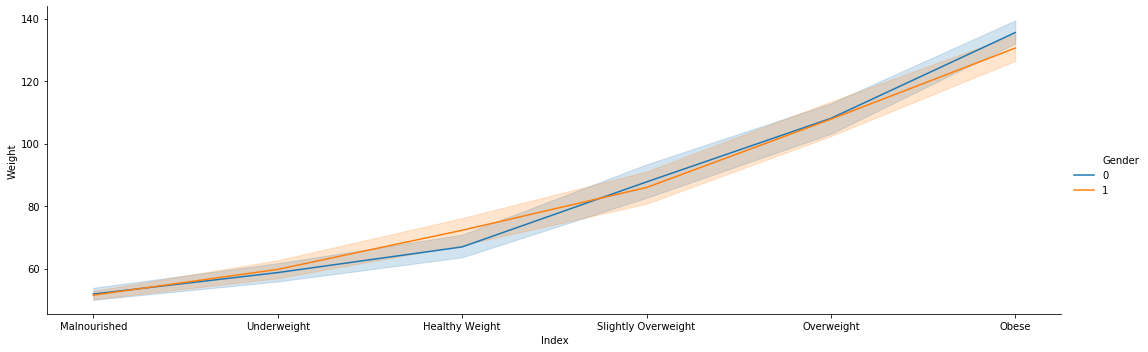

In [25]:
sns.relplot(x = 'Index', y = "Weight", hue = "Gender", kind = 'line', data = dataset, height = 5, aspect = 3)

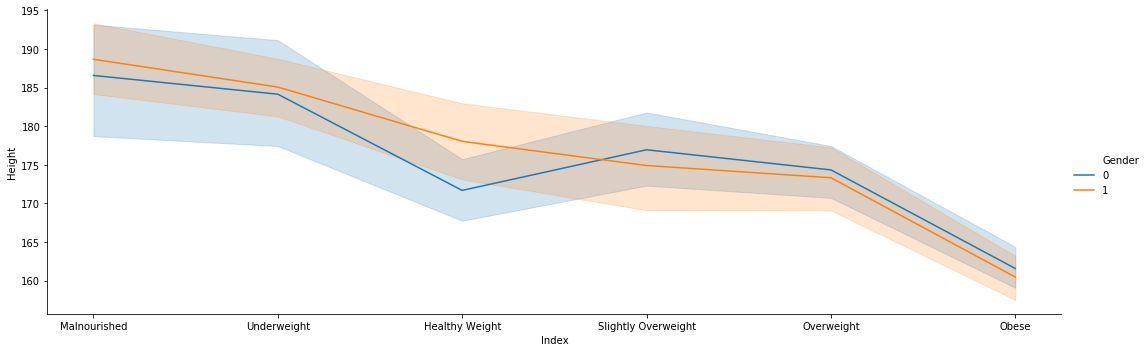

In [26]:
sns.relplot(x = 'Index', y = "Height", hue = "Gender", kind = 'line', data = dataset, height = 5, aspect = 3)

In [27]:
#X is the training data and y will be the testing data
#Splitting into two dataframes
x = dataset.drop('Index', axis =1)
y = dataset['Index']
#Split it into categories of training data and testing data
#Splits into subsets of different data to work with 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [29]:
classify = svm.SVC()
classify.fit(x_train, y_train)
prediction = classify.predict(x_test)

In [30]:
print(classification_report(y_test, prediction))

                     precision    recall  f1-score   support

     Healthy Weight       0.73      0.80      0.76        10
       Malnourished       0.00      0.00      0.00         3
              Obese       0.88      0.97      0.92        36
         Overweight       0.96      0.78      0.86        32
Slightly Overweight       0.78      0.93      0.85        15
        Underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



D:\learning\Python\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(confusion_matrix(y_test, prediction))

[[ 8  0  0  0  2  0]
 [ 1  0  0  0  0  2]
 [ 0  0 35  1  0  0]
 [ 0  0  5 25  2  0]
 [ 1  0  0  0 14  0]
 [ 1  0  0  0  0  3]]


In [32]:
print(accuracy_score(y_test, prediction))

0.85


In [42]:
exampleData = [[0,164,40]]
exampleData = s.transform(exampleData)
forecast = classify.predict(exampleData)

In [43]:
exampleData

array([[-0.95118973, -0.32483282, -2.01552875]])

In [44]:
forecast

array(['Healthy Weight'], dtype=object)

In [36]:
exampleData = [[0,237,40]]
exampleData = s.transform(exampleData)
forecast = classify.predict(exampleData)

In [37]:
forecast

array(['Overweight'], dtype=object)

In [39]:
exampleData = [[0,37,40]]
exampleData = s.transform(exampleData)
forecast = classify.predict(exampleData)
forecast

array(['Overweight'], dtype=object)